# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [30]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import train_test_split

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Your code here
df = pd.read_csv('data_all.zip')

In [32]:
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data=df.values 
print ('Dimensiones matriz de datos: {}'.format(data.shape))

Dimensiones matriz de datos: (116322, 785)


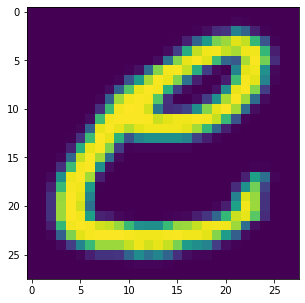

In [34]:
plt.figure(figsize=(5,5))
plt.imshow(data[6,1:].reshape(28,28))  
plt.show()

In [35]:
alphabet={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

In [39]:
number=df[df['e']<10]

In [40]:
uppercase=df[(df['e']>=10) & (df['e']<36)]

In [41]:
lowercase=df[df['e']>=36]

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [42]:
# Your code here

X_train,X_test,y_train,y_test=train_test_split(uppercase.drop(['e'],axis=1),
                                              uppercase.e,test_size=0.2,random_state=42)

In [43]:
neig = neighbors.KNeighborsClassifier()

neig.fit(X_train, y_train)
neig.score(X_test,y_test)

0.881639814962514

In [44]:
neig.score(X_test,y_test)

0.881639814962514

* Try to do the same thing with lowercases.

In [45]:
# Your code here
X_train,X_test,y_train,y_test=train_test_split(lowercase.drop(['e'],axis=1),
                                              lowercase.e,test_size=0.2,random_state=42)

In [46]:
neig = neighbors.KNeighborsClassifier()

neig.fit(X_train, y_train)
neig.score(X_test,y_test)

0.8628972653362897

* Try to do the same thing with numbers.

In [48]:
# Your code here
X_train,X_test,y_train,y_test=train_test_split(number.drop(['e'],axis=1),
                                              number.e,test_size=0.2,random_state=42)

In [49]:
neig = neighbors.KNeighborsClassifier()

neig.fit(X_train, y_train)
neig.score(X_test,y_test)

0.9709944751381215